In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [119]:
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

M1 = nn.Linear(2, 8, bias=False)
M2 = nn.Linear(8, 1, bias=False)

In [120]:
M2(M1(x)).squeeze()
# x = torch.tensor([[1, 2]])


print(M1(x))

tensor([[-3.2570e+00, -2.3686e+00,  3.4812e-01,  2.1613e+00, -8.0666e-01,
         -1.3013e+00, -3.0147e-01, -2.9223e+00],
        [-2.7671e+00, -1.9241e+00,  5.0904e-01,  1.8324e+00, -7.2935e-01,
         -1.1826e+00, -3.9022e-01, -2.6229e+00],
        [-9.6642e-01,  3.6302e-03,  1.8095e+00,  6.1083e-01, -5.9152e-01,
         -1.0023e+00, -1.1622e+00, -1.9877e+00],
        [-4.3823e+00, -2.2156e+00,  2.8145e+00,  2.8661e+00, -1.5696e+00,
         -2.5982e+00, -1.8807e+00, -5.4727e+00]], grad_fn=<MmBackward0>)


In [96]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2, 8, bias=False)
        self.M2 = nn.Linear(8, 1, bias=False)
    def forward(self, x):
        x = self.M1(x)
        x = self.M2(x)
        return x.squeeze()

Здесь лежат все параметры, которые мы пытаемся оптимизировать (все коэффициенты). То есть в данном случае
матрицы M1 и M2

In [97]:
f = MyNeuralNet()
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[-0.3684, -0.6244],
        [ 0.3790, -0.3041],
        [ 0.5772, -0.3164],
        [ 0.2547, -0.6282],
        [ 0.0128,  0.5517],
        [ 0.6910, -0.4205],
        [-0.4729, -0.1163],
        [ 0.3557, -0.2706]], requires_grad=True)
Parameter containing:
tensor([[-0.1549, -0.2956, -0.1884, -0.0374,  0.0869,  0.2926,  0.2155,  0.1351]],
       requires_grad=True)


In [98]:
y_hat = f(x)
y_hat

tensor([0.1234, 0.1471, 0.3751, 0.6314], grad_fn=<SqueezeBackward0>)

Mean Squared Error (sum_n(y-y_hat)^2 / n) (нет корня)

In [99]:
L = nn.MSELoss()

In [100]:
opt = torch.optim.SGD(f.parameters(), lr=0.001)

In [109]:
losses = []
for _ in range(500):
    opt.zero_grad()
    loss_value = L(f(x), y)  # compute Loss
    loss_value.backward()  # compute gradient
    opt.step()  # Perform iteration using gradient above
    losses.append(loss_value.item())

tensor([2.7778, 2.4994, 1.9395, 5.2710], grad_fn=<SqueezeBackward0>)


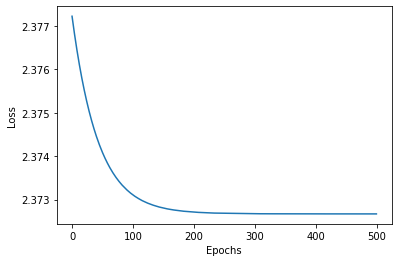

In [111]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
print(f(x))

In [103]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(6, 16, (5, 5))
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [104]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

# Zero the gradient buffers of all parameters and backprops with random gradients:
net.zero_grad()
out.backward(torch.randn(1, 10))

tensor([[ 0.0578, -0.0099,  0.0209,  0.0628,  0.0661, -0.0753,  0.0558, -0.0915,
          0.0028, -0.0834]], grad_fn=<AddmmBackward0>)
